## 

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Introduction</h3>
</div>

**What is Customer Churn?**

Customer churn is the percentage of customers that stopped using company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate as it is much less expensive to retain existing customers than it is to acquire new customers. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Customer churn is extremley costly for companies. Based on a churn rate just under two percent for top companies, one source estimates carriers lose $65 million per month from churn. To reduce customer churn, telecom companies should predict which customers are highly prone to churn.

Individualized customer retention is demanding because most companies have a large number of customers and cannot afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could concentrate customer retention efforts only on these "high risk" clients.

## <a name='Obejctives'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Obejctives</h3>
</div>

In this projects below questions will be answered:

* What's the $\%$ of  Customers Churn and customers that keep in with the active services?
* Is there any patterns in Customers Churn based on the gender?
* Is there any patterns/preference in Customers Churn based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Which features have the most impact on predicting customers churn?
* Which model is the best for predicting churn?

## <a name='Dataset_Features'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Dataset Features</h3>
</div>

# Customer Churn Dataset Overview

1. **`Customer ID`**: A unique ID that identifies each customer.

## Demographic Information about Customers:

2. **`CreditScore`**: The credit score of the customer.
3. **`Geography`**: The country where the customer resides (e.g., France, Spain, Germany).
4. **`Gender`**: The gender of the customer (Male, Female).
5. **`Age`**: The age of the customer.
6. **`Tenure`**: The number of months the customer has stayed with the company.
7. **`Balance`**: The account balance of the customer.
8. **`NumOfProducts`**: The number of products the customer has subscribed to.
9. **`HasCrCard`**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
10. **`IsActiveMember`**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
11. **`EstimatedSalary`**: The estimated salary of the customer.

## Customer Account Information:

12. **`Exited`**: Target variable indicating whether the customer has left within the last month (1 = Yes, 0 = No).

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Import Libraries and Data</h3></center>
</div>



In [1]:
!pip install mlens

In [2]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# import Sequence from collections.abc for compatibility with Python 3.10+
from collections.abc import Sequence

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import BorderlineSMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier

# evaluations

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay  # Updated import
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

[MLENS] backend: threading


In [3]:
data = pd.read_csv('Churn.csv')

# <a name='Handling_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Handling Missing Values</h3></center>
</div>


let's find if we have missing values in the dataset. 

In [4]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [5]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

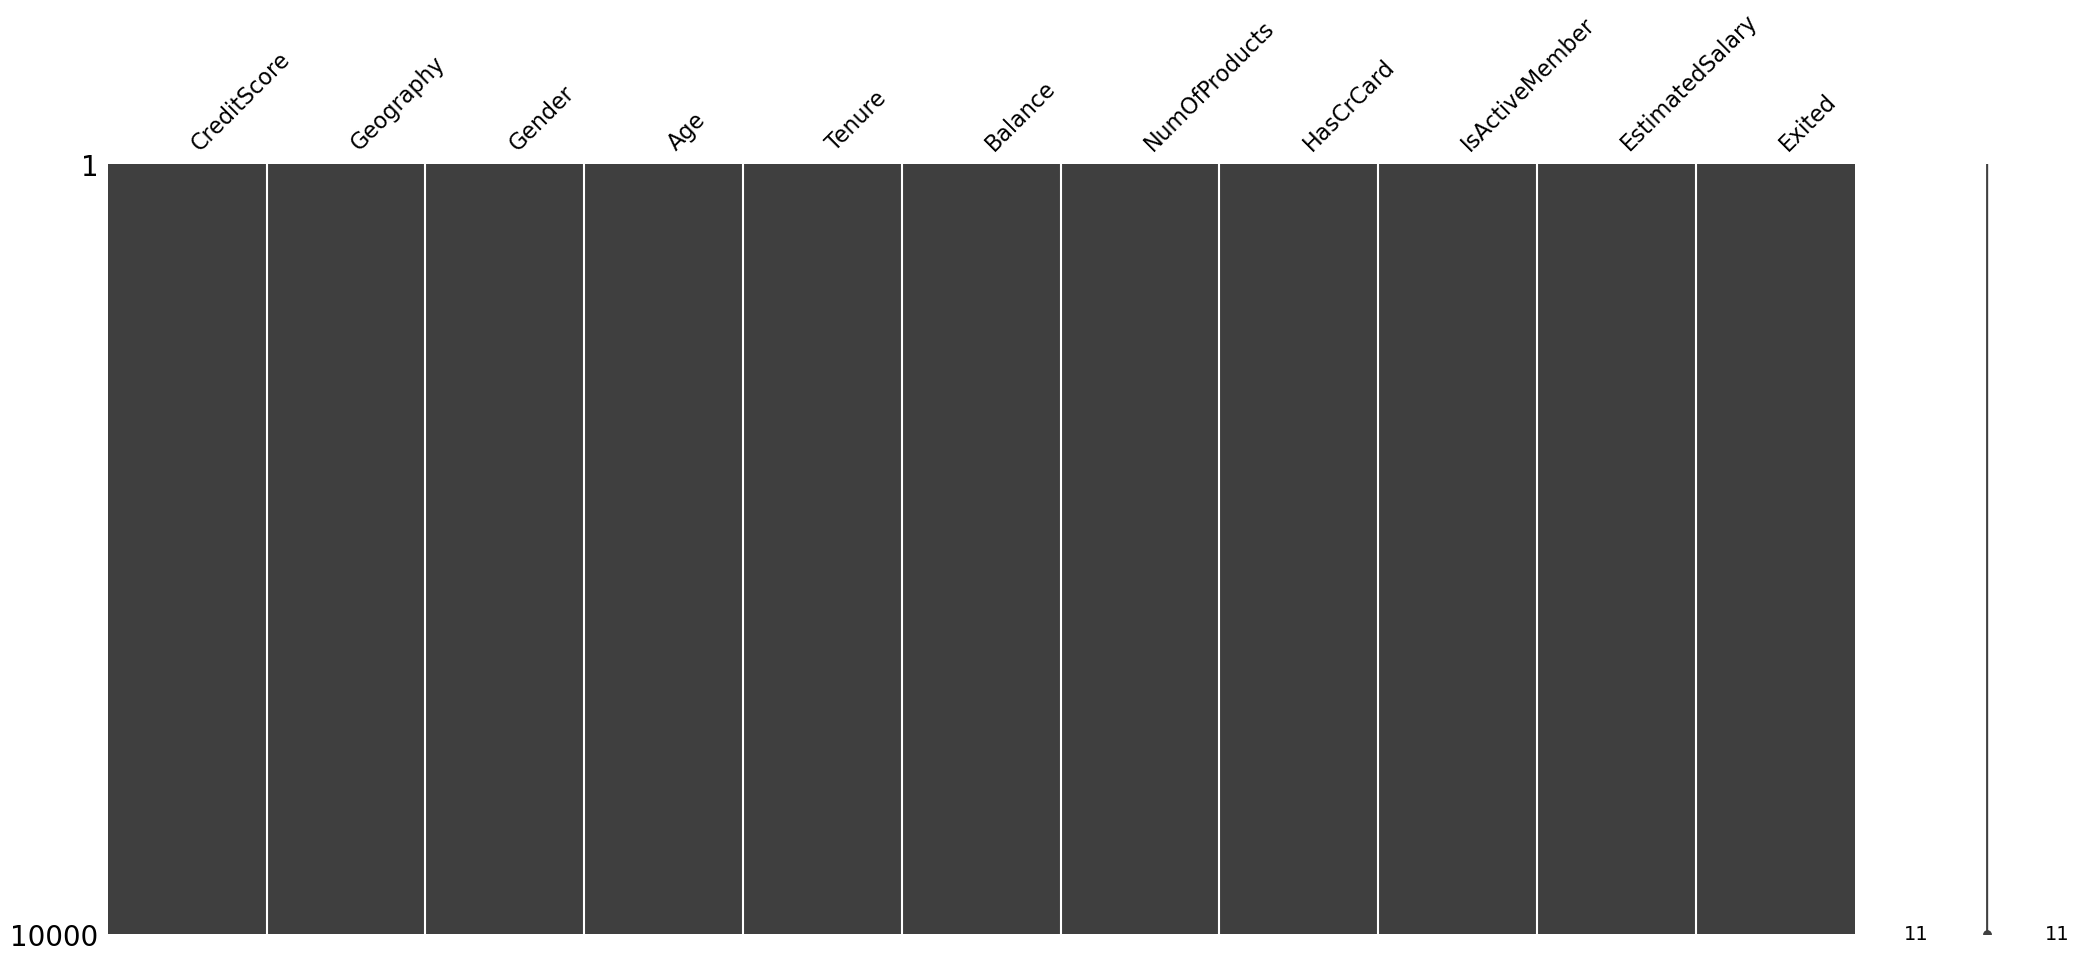

In [6]:
msno.matrix(data);

If we examine the data carefully, we can actually estimate the value of the missing data. 

Contract length in month * tenure (if not 0) * monthly charges

This is more accurate than filling missing values with mean or median.

In [7]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

let's find if we have duplicate rows.

In [8]:
data.duplicated().sum()

0

# <a name='Data_Analysis_and_Visualization'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Data Analysis and Visualization</h3></center>
</div>



In [9]:
data.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1

In [10]:
data.shape

(10000, 11)

There are 10000 cutomers and 11 features in the dataset.

In [11]:
for i in data.columns[6:-3]:
  print(f'Number of categories in the variable {i}: {len(data[i].unique())}')

Number of categories in the variable NumOfProducts: 4
Number of categories in the variable HasCrCard: 2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
data.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [14]:
data.describe(include=object).T

count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [15]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Update the gender pie chart
fig.add_trace(go.Pie(labels=data['Gender'].unique(), values=data['Gender'].value_counts(), name='Gender', 
                     marker_colors=['gold', 'mediumturquoise']), 1, 1)

# Update the churn pie chart
fig.add_trace(go.Pie(labels=data['Exited'].unique(), values=data['Exited'].value_counts(), name='Churn', 
                     marker_colors=['darkorange', 'lightgreen']), 1, 2)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Gender and Churn Distributions<b>', 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)]
)

iplot(fig)

* We have imbalanced data.

* **20.4%** of customers exited (switched to another company), while **79.6%** did not.

* Customers are **45.4%** female and **54.6%** male.

In [16]:
fig = px.sunburst(data, path=['Exited', 'Gender'], title='<b>Sunburst Plot of Gender and Churn<b>')
iplot(fig)

In [17]:
print(f'A female customer has a probability of {round(data[(data["Gender"] == "Female") & (data["Exited"] == 1)].count()[0] / data[(data["Gender"] == "Female")].count()[0] * 100, 2)}% churn')

print(f'A male customer has a probability of {round(data[(data["Gender"] == "Male") & (data["Exited"] == 1)].count()[0] / data[(data["Gender"] == "Male")].count()[0] * 100, 2)}% churn')

A female customer has a probability of 25.07% churn
A male customer has a probability of 16.46% churn


* There is a negligible difference in the percentage of customers who exited (changed service providers). Both genders exhibited similar behavior regarding churn.

In [18]:
import plotly.express as px

# Create the histogram
fig = px.histogram(data, x='Exited', color='Gender', barmode='group', 
                   title='<b>Customer Gender Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence=['#EC7063', '#0BF0D1'], 
                   text_auto=True)

# Update layout for better presentation
fig.update_layout(
    width=1100,
    height=500,
    bargap=0.3,
    xaxis_title='Churn Status (Exited)',
    yaxis_title='Number of Customers',
    legend_title='Gender',
    title_x=0.5,  # Center the title
    title_font=dict(size=20, color='black'),
    margin=dict(l=40, r=40, t=40, b=40)  # Add margins
)

# Update traces for better visibility
fig.update_traces(marker_line_width=2, marker_line_color='black', textfont_size=12)

# Show the plot without HTML output
fig.show()

In [19]:

# Example probabilities based on NumOfProducts
print(f'A customer with 1 product has a probability of {round(data[(data["NumOfProducts"] == 1) & (data["Exited"] == 1)].count()[0] / data[(data["NumOfProducts"] == 1)].count()[0] * 100, 2)}% churn')

print(f'A customer with 2 products has a probability of {round(data[(data["NumOfProducts"] == 2) & (data["Exited"] == 1)].count()[0] / data[(data["NumOfProducts"] == 2)].count()[0] * 100, 2)}% churn')

print(f'A customer with 3 products has a probability of {round(data[(data["NumOfProducts"] == 3) & (data["Exited"] == 1)].count()[0] / data[(data["NumOfProducts"] == 3)].count()[0] * 100, 2)}% churn')

A customer with 1 product has a probability of 27.71% churn
A customer with 2 products has a probability of 7.58% churn
A customer with 3 products has a probability of 82.71% churn


* About **27.71%** of customers with 1 product opted to move out, compared to **7.58%** of customers with 2 products and **82.71%** with 3 products. A significant percentage of customers who left the company had 3 products. This is logical, as customers with fewer products may be less committed to the company.

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

# Create bins for estimated salary for better visualization
salary_bins = [0, 50000, 100000, 150000, 200000, 250000]
salary_labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
data['SalaryGroup'] = pd.cut(data['EstimatedSalary'], bins=salary_bins, labels=salary_labels)

fig.add_trace(go.Pie(labels=data['SalaryGroup'].unique(), 
                     values=data['SalaryGroup'].value_counts(), 
                     name='Estimated Salary Distribution',
                     marker_colors=['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'lightblue']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Estimated Salary Distribution<b>', 
    annotations=[dict(text='Estimated Salary', x=0.5, y=0.5, font_size=18, showarrow=False)]
)

# Show the plot without HTML output
fig.show()

In [ ]:
import plotly.express as px

# Create the histogram
fig = px.histogram(data, x='Exited', color='EstimatedSalary', barmode='group', 
                   title='<b>Estimated Salary Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence=['#EC7063', '#0BF0D1', '#E9F00B', '#5DADE2'], 
                   text_auto=True)

# Update layout for better presentation
fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2, marker_line_color='black')

# Show the plot without HTML output
fig.show()

In [22]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the churn dataset

# Create bins for estimated salary
salary_bins = [0, 50000, 100000, 150000, 200000, 250000]
salary_labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
data['SalaryGroup'] = pd.cut(data['EstimatedSalary'], bins=salary_bins, labels=salary_labels)

# Calculate churn probabilities based on salary groups
for label in salary_labels:
    total_customers = data[data['SalaryGroup'] == label].count()[0]
    churned_customers = data[(data['SalaryGroup'] == label) & (data['Exited'] == 1)].count()[0]
    
    # Avoid division by zero
    if total_customers > 0:
        churn_probability = round((churned_customers / total_customers) * 100, 2)
        print(f'A customer in the salary group {label} has a probability of {churn_probability}% churn')
    else:
        print(f'A customer in the salary group {label} has no data available.')

A customer in the salary group <50k has a probability of 19.93% churn
A customer in the salary group 50k-100k has a probability of 19.87% churn
A customer in the salary group 100k-150k has a probability of 20.23% churn
A customer in the salary group 150k-200k has a probability of 21.47% churn
A customer in the salary group 200k+ has no data available.


## Churn Probability by Salary Group

- A customer in the salary group **<50k** has a probability of **19.93%** churn.
- A customer in the salary group **50k-100k** has a probability of **19.87%** churn.
- A customer in the salary group **100k-150k** has a probability of **20.23%** churn.
- A customer in the salary group **150k-200k** has a probability of **21.47%** churn.
- A customer in the salary group **200k+** has no data available.

In [23]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame containing the churn dataset

# Calculate churn counts for each gender and number of products
churn_counts = data.groupby(['NumOfProducts', 'Gender', 'Exited']).size().unstack(fill_value=0)

# Prepare data for the bar chart
x_labels = []
y_values = []

for num_products in churn_counts.index:
    x_labels.extend([f'Churn:No ({num_products})', f'Churn:Yes ({num_products})'])
    y_values.extend([churn_counts.loc[num_products, 0], churn_counts.loc[num_products, 1]])

# Create the bar chart
fig = go.Figure()

# Add traces for each number of products
for i, num_products in enumerate(churn_counts.index):
    fig.add_trace(go.Bar(
        x=x_labels[i*2:i*2+2],
        y=y_values[i*2:i*2+2],
        name=f'Products: {num_products}',
    ))

# Update layout
fig.update_layout(title_text='<b>Churn Distribution w.r.t. Number of Products and Gender</b>')
fig.update_traces(marker_line_width=2, marker_line_color='black')

# Show the plot without HTML output
fig.show()

## Churn Distribution w.r.t. Number of Products and Gender

The bar chart illustrates the churn distribution based on the number of products and gender. The key observations are as follows:

- **Churn Rates**:
  - Customers with **1 product** show a relatively low churn rate, with a slight difference between genders.
  - Customers with **2 products** have a higher churn rate, particularly among females.
  - The churn rate significantly increases for customers with **3 products**, indicating a notable trend in customer retention.
  - Customers with **4 products** exhibit the highest churn rates, especially among males.

### Summary of Churn Counts:
- **Churn: No**:
  - 1 Product: Female and Male have similar counts.
  - 2 Products: Female counts are slightly higher than Male.
  - 3 Products: Male counts are higher than Female.
  - 4 Products: Female counts are significantly lower than Male.

- **Churn: Yes**:
  - 1 Product: Churn counts are low for both genders.
  - 2 Products: Female churn counts are higher than Male.
  - 3 Products: Male churn counts are notably higher.
  - 

In [24]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create bins for balance
balance_bins = [0, 5000, 10000, 20000, 50000, 100000, 200000]
balance_labels = ['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
data['BalanceGroup'] = pd.cut(data['Balance'], bins=balance_bins, labels=balance_labels)

# Create the pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['BalanceGroup'].unique(), 
                     values=data['BalanceGroup'].value_counts(), 
                     name='Balance Distribution',
                     marker_colors=['gold', 'purple', 'lightblue', 'lightgreen', 'orange', 'red']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Balance Distribution<b>', 
    annotations=[dict(text='Balance', x=0.5, y=0.5, font_size=18, showarrow=False)]
)

# Show the plot without HTML output
fig.show()

In [25]:
import pandas as pd
import plotly.express as px

# Create bins for balance
balance_bins = [0, 5000, 10000, 20000, 50000, 100000, 200000]
balance_labels = ['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
data['BalanceGroup'] = pd.cut(data['Balance'], bins=balance_bins, labels=balance_labels)

# Create the histogram
fig = px.histogram(data, x='BalanceGroup', color='Exited', barmode='group', 
                   title='<b>Balance Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence=['#C82735', '#BCC827'], text_auto=True)

# Update layout for better presentation
fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2, marker_line_color='black')

# Show the plot without HTML output
fig.show()

In [26]:
# Create bins for balance
balance_bins = [0, 5000, 10000, 20000, 50000, 100000, 200000]
balance_labels = ['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
data['BalanceGroup'] = pd.cut(data['Balance'], bins=balance_bins, labels=balance_labels)

# Calculate churn probabilities based on balance groups
for label in balance_labels:
    total_customers = data[data['BalanceGroup'] == label].count()[0]
    churned_customers = data[(data['BalanceGroup'] == label) & (data['Exited'] == 1)].count()[0]
    
    # Avoid division by zero
    if total_customers > 0:
        churn_probability = round((churned_customers / total_customers) * 100, 2)
        print(f'A customer in the balance group {label} has a probability of {churn_probability}% churn')
    else:
        print(f'A customer in the balance group {label} has no data available.')

A customer in the balance group 0-5k has a probability of 100.0% churn
A customer in the balance group 5k-10k has no data available.
A customer in the balance group 10k-20k has a probability of 33.33% churn
A customer in the balance group 20k-50k has a probability of 33.8% churn
A customer in the balance group 50k-100k has a probability of 19.88% churn
A customer in the balance group 100k+ has a probability of 25.02% churn


## Churn Probability by Balance Group

The following summarizes the churn probabilities for different balance groups:

- **Balance Group 0-5k**: A customer in this group has a probability of **100.0%** churn.
- **Balance Group 5k-10k**: No data is available for customers in this group.
- **Balance Group 10k-20k**: A customer in this group has a probability of **33.33%** churn.
- **Balance Group 20k-50k**: A customer in this group has a probability of **33.8%** churn.
- **Balance Group 50k-100k**: A customer in this group has a probability of **19.88%** churn.
- **Balance Group 100k+**: A customer in this group has a probability of **25.02%** churn.

### Summary
The analysis indicates that customers with a balance of **0-5k** are at the highest risk of churn, while those in the **50k-100k** group show a significantly lower churn probability. The **5k-10k** group lacks sufficient data for analysis.

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['HasCrCard'].unique(), 
                     values=data['HasCrCard'].value_counts(), 
                     name='Has Credit Card',
                     marker_colors=['#1AE178', '#2CECE6']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Credit Card Ownership Distribution<b>', 
    annotations=[dict(text='Has Credit Card', x=0.5, y=0.5, font_size=18, showarrow=False)]
)

# Show the plot without HTML output
fig.show()

In [28]:
# Create the histogram
fig = px.histogram(data, x='Exited', color='HasCrCard', barmode='group', 
                   title='<b>Credit Card Ownership Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence=['#EB984E', 'yellow'], text_auto=True)

# Update layout for better presentation
fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2, marker_line_color='black')

# Show the plot without HTML output
fig.show()

In [30]:
# Calculate churn probabilities based on HasCrCard
print(f'A customer with a credit card has a probability of {round(data[(data["HasCrCard"] == 1) & (data["Exited"] == 1)].count()[0] / data[(data["HasCrCard"] == 1)].count()[0] * 100, 2)}% churn')

print(f'A customer without a credit card has a probability of {round(data[(data["HasCrCard"] == 0) & (data["Exited"] == 1)].count()[0] / data[(data["HasCrCard"] == 0)].count()[0] * 100, 2)}% churn')

A customer with a credit card has a probability of 20.18% churn
A customer without a credit card has a probability of 20.81% churn


## Churn Probability by Credit Card Ownership

The following summarizes the churn probabilities for customers based on their credit card ownership:

- **Customers with a Credit Card**: A customer in this group has a probability of **20.18%** churn.
- **Customers without a Credit Card**: A customer in this group has a probability of **20.81%** churn.

### Summary
The analysis indicates that customers without a credit card have a slightly higher churn probability compared to those with a credit card. This insight can inform targeted retention strategies for customers based on their credit card status.

In [31]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create bins for tenure
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']
data['TenureGroup'] = pd.cut(data['Tenure'], bins=tenure_bins, labels=tenure_labels)

# Create the pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['TenureGroup'].unique(), 
                     values=data['TenureGroup'].value_counts(), 
                     name='Tenure Distribution',
                     marker_colors=['#DE3163', '#DFFF00', '#40E0D0', '#FF7F50', '#6495ED', '#FFD700']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Tenure Distribution<b>', 
    annotations=[dict(text='Tenure', x=0.5, y=0.5, font_size=18, showarrow=False)]
)

# Show the plot without HTML output
fig.show()

In [32]:
import pandas as pd
import plotly.express as px

# Create bins for tenure
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']
data['TenureGroup'] = pd.cut(data['Tenure'], bins=tenure_bins, labels=tenure_labels)

# Create the histogram
fig = px.histogram(data, x='TenureGroup', color='Exited', barmode='group', 
                   title='<b>Tenure Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence=['#FFBF00', 'IndianRed'], text_auto=True)

# Update layout for better presentation
fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2, marker_line_color='black')

# Show the plot without HTML output
fig.show()

In [33]:
# Create bins for tenure if not already created
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']
data['TenureGroup'] = pd.cut(data['Tenure'], bins=tenure_bins, labels=tenure_labels)

# Calculate churn probabilities based on tenure groups
for label in tenure_labels:
    total_customers = data[data['TenureGroup'] == label].count()[0]
    churned_customers = data[(data['TenureGroup'] == label) & (data['Exited'] == 1)].count()[0]
    
    # Avoid division by zero
    if total_customers > 0:
        churn_probability = round((churned_customers / total_customers) * 100, 2)
        print(f'A customer in the tenure group {label} has a probability of {churn_probability}% churn')
    else:
        print(f'A customer in the tenure group {label} has no data available.')

A customer in the tenure group 0-1 Year has a probability of 20.26% churn
A customer in the tenure group 1-2 Years has no data available.
A customer in the tenure group 2-3 Years has no data available.
A customer in the tenure group 3-4 Years has no data available.
A customer in the tenure group 4-5 Years has no data available.
A customer in the tenure group 5+ Years has no data available.


## Churn Probability for Tenure Group

- **Tenure Group: 0-1 Year**: A customer in this group has a probability of **20.26%** churn.

### Summary
This indicates that customers who have been with the service for less than one year have a notable churn probability. Understanding this churn rate can help in developing targeted retention strategies for newer customers.

In [34]:
import plotly.express as px

# Create the histogram
fig = px.histogram(data, x='Balance', color='Exited', marginal='box', 
                   title='<b>Balance Distribution w.r.t. Churn<b>',
                   color_discrete_sequence=['#84D57F', '#C959DA'])

# Show the plot without HTML output
fig.show()

## Balance Distribution w.r.t. Churn

The histogram and box plot illustrate the distribution of customer balances in relation to churn status:

- **Churn Status**:
  - **Exited (Churned)**: Customers who have exited the service are represented in **purple**.
  - **Not Exited (Retained)**: Customers who have not exited are represented in **green**.

### Key Observations:
- The majority of customers with a balance of **0** are in the **Exited** category, indicating a high churn rate among those with no balance.
- As the balance increases, the number of customers who have exited decreases, suggesting that higher balances may correlate with lower churn rates.
- The box plot shows the median and interquartile range for both groups, highlighting the differences in balance distributions between churned and retained customers.

### Summary
This analysis indicates that customers with higher balances tend to remain with the service, while those with lower or zero balances are more likely to churn. Understanding these trends can help in developing targeted retention strategies for at-risk customers.

In [35]:
import plotly.express as px

# Create the histogram
fig = px.histogram(data, x='Tenure', color='Exited', marginal='box', 
                   title='<b>Tenure Distribution w.r.t. Churn<b>',
                   color_discrete_sequence=['blue', 'red'])

# Show the plot without HTML output
fig.show()

## Tenure Distribution w.r.t. Churn

The histogram and box plot illustrate the distribution of customer tenure in relation to churn status:

- **Churn Status**:
  - **Exited (Churned)**: Customers who have exited the service are represented in **red**.
  - **Not Exited (Retained)**: Customers who have not exited are represented in **blue**.

### Key Observations:
- The majority of customers have a tenure of **0 to 10 months**, with a significant number of churned customers (red) in this range.
- The box plot indicates that churned customers tend to have a shorter tenure compared to retained customers, as evidenced by the lower median tenure for the exited group.
- The distribution shows that as tenure increases, the number of retained customers also increases, suggesting that longer-tenured customers are less likely to churn.

### Summary
This analysis indicates that customers with shorter tenures are at a higher risk of churn. Understanding these trends can help in developing targeted retention strategies for newer customers, potentially improving overall customer retention rates.

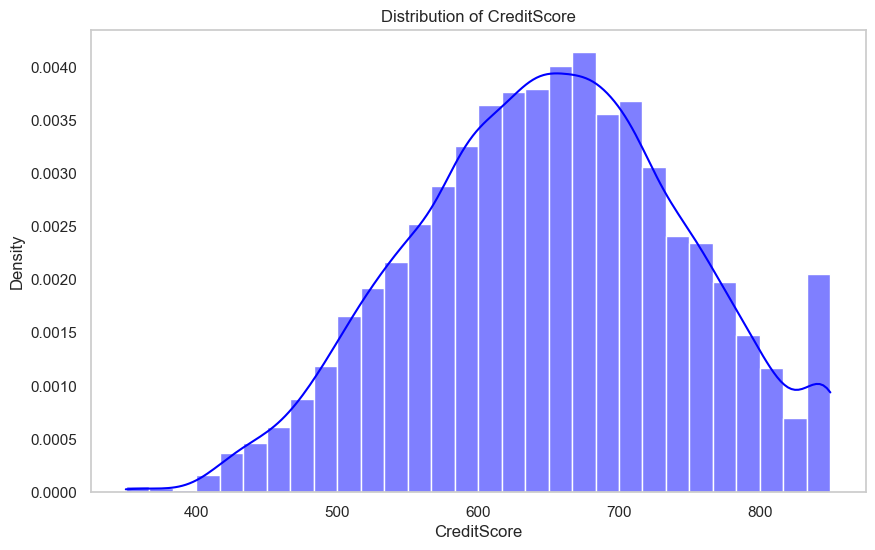

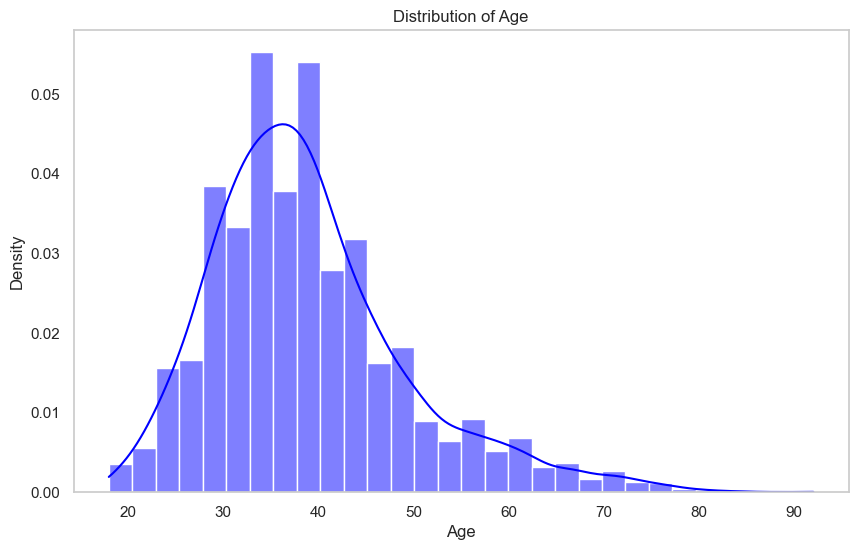

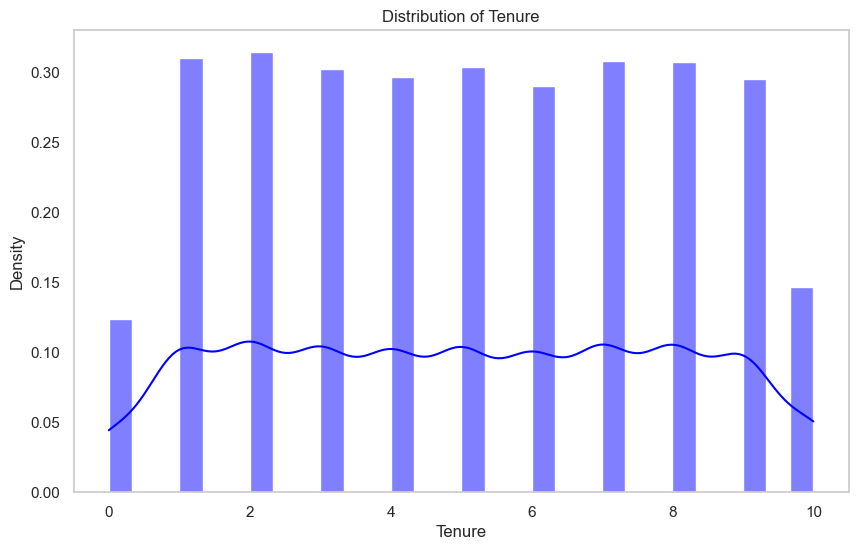

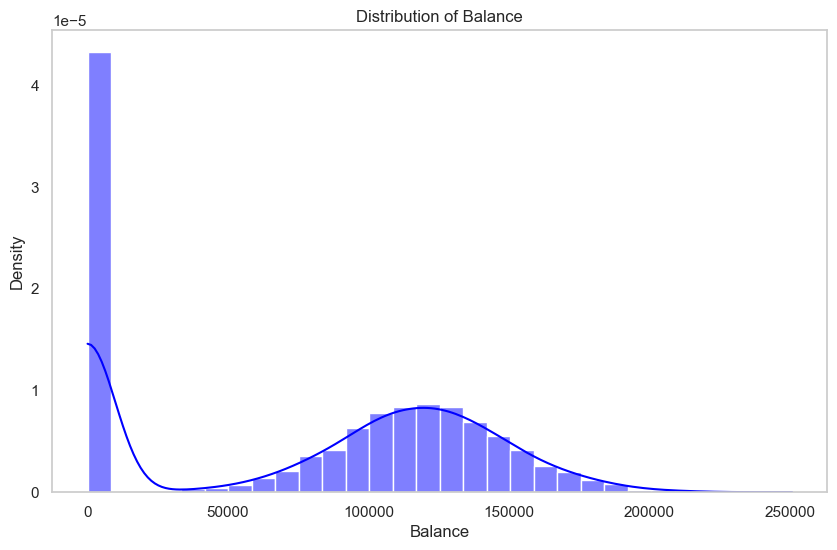

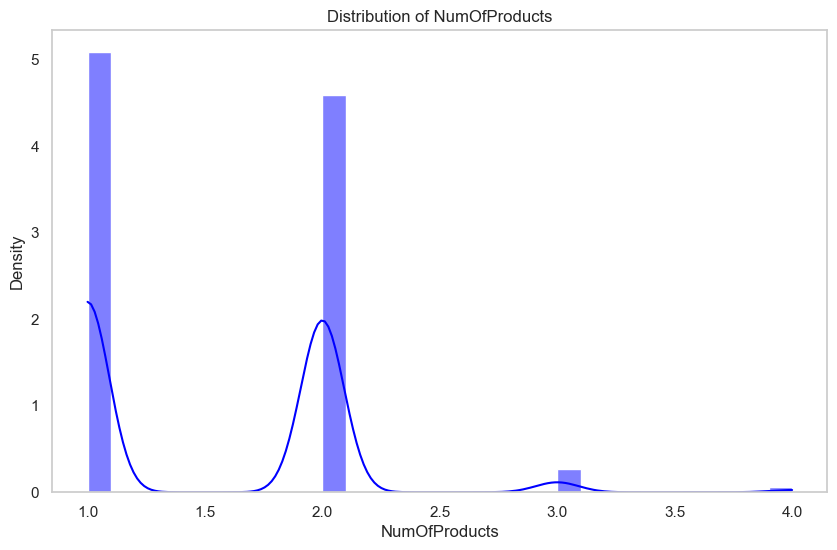

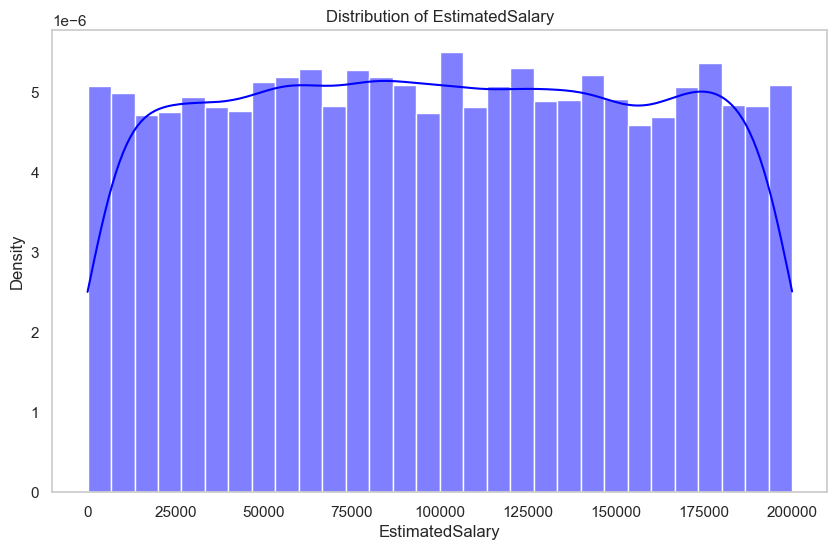

In [40]:


# Load the dataset
data = pd.read_csv('churn.csv')

# Set the style of seaborn
sns.set(style="whitegrid")

# List of columns to plot
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create distribution plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue', stat='density')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid()
    plt.show()

In [41]:
# Create subplots
fig = make_subplots(rows=1, cols=3)

# Add box plot for Balance
fig.add_trace(go.Box(y=data['Balance'], notched=True, name='Balance', marker_color='#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

# Add box plot for Age
fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color='#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

# Add box plot for NumOfProducts
fig.add_trace(go.Box(y=data['NumOfProducts'], notched=True, name='Num of Products', marker_color='lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

# Update layout
fig.update_layout(title_text='<b>Box Plots for Selected Numerical Variables<b>')

# Show the plot
fig.show()

<p align="center">
  <img width="600" height="300" src="https://miro.medium.com/proxy/1*ghJQrcLZXGWxDPzppLWULA.png">
</p>

In [44]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# <a name='Balance_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Balance Data</h3></center>
</div>



In [46]:
import plotly.express as px
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('churn.csv')

# Create the bar plot
fig = px.bar(x=data['Exited'].unique()[::-1], 
             y=[data[data['Exited'] == 1].count()[0], data[data['Exited'] == 0].count()[0]],
             text=[np.round(data[data['Exited'] == 1].count()[0] / data.shape[0], 4), 
                   np.round(data[data['Exited'] == 0].count()[0] / data.shape[0], 4)],
             color_discrete_sequence=['#ff9999'])

# Update layout
fig.update_layout(title_text='<b>Churn Count Plot<b>', 
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1),
                  width=700, height=400, bargap=0.4)

fig.update_layout({'yaxis': {'title': 'Count'}, 'xaxis': {'title': 'Churn'}})

# Show the plot
fig.show()

## Churn Count Plot

The bar plot illustrates the distribution of customer churn in the dataset:

- **Churn Status**:
  - **0 (Not Exited)**: Represents customers who have not churned, accounting for approximately **20.37%** of the total.
  - **1 (Exited)**: Represents customers who have churned, making up about **79.63%** of the total.

### Key Observations
- The majority of customers in the dataset have exited, indicating a significant churn rate.
- This information is crucial for understanding customer retention and can inform strategies to improve customer loyalty and reduce churn.

### Summary
The analysis highlights the need for targeted retention efforts, particularly for the large segment of customers who have already exited the service.

In [50]:


# Load the dataset
data = pd.read_csv('churn.csv')

# Define features and target variable
X = data.drop(['Exited'], axis=1)  # Drop the target column
y = data['Exited']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Apply Borderline SMOTE for oversampling
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

# <a name='Dataset_Splitting'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Dataset Splitting</h3></center>
</div>



let's separate the data into training and testing set.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((14333, 11), (1593, 11))

# <a name='Feature_Scaling'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Feature Scaling</h3></center>
</div>



In this section, numerical features are scaled.

StandardScaler = $\frac{x-\mu}{s}$

In [53]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the selected numerical features
X_train[['Balance', 'EstimatedSalary', 'Age']] = scaler.fit_transform(X_train[['Balance', 'EstimatedSalary', 'Age']])
X_test[['Balance', 'EstimatedSalary', 'Age']] = scaler.transform(X_test[['Balance', 'EstimatedSalary', 'Age']])

# <a name='Modeling_and_Parameter_Optimization'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Modeling and Parameter Optimization</h3></center>
</div>



In [54]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

**Model 1: Random Forest**

In [56]:
RF_S = RandomForestClassifier(random_state = 42)
params_RF = {'n_estimators': list(range(50,100)), 'min_samples_leaf': list(range(1,5)), 'min_samples_split': list(range(1,5))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(X_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

Best parameters: RandomForestClassifier(n_estimators=65, random_state=42)


In [57]:
RF = RandomForestClassifier(n_estimators=70, random_state=42)
cross_val_RF_Acc = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_RF_AUC = cross_val_score(RF, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model 2: KNN**

In [58]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(X_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

Best parameters: KNeighborsClassifier(n_neighbors=9)


In [59]:
KNN = KNeighborsClassifier(n_neighbors=1)
cross_val_KNN_Acc = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'accuracy') 
cross_val_KNN_f1 = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_KNN_AUC = cross_val_score(KNN, X_train, y_train, cv = CV, scoring = 'roc_auc')

**Model 3: Decision Tree**

In [60]:
DT_S = DecisionTreeClassifier(random_state=42)
params_DT = {'min_samples_leaf': list(range(1,6)), 'min_samples_split': list(range(1,6))}
grid_DT = RandomizedSearchCV(DT_S, param_distributions=params_DT, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_DT.fit(X_train, y_train)
print('Best parameters:', grid_DT.best_estimator_)

Best parameters: DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=4, random_state=42)


In [61]:
DT = DecisionTreeClassifier(random_state=42)
cross_val_DT_Acc = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'accuracy') 
cross_val_DT_f1 = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'f1')
cross_val_DT_AUC = cross_val_score(DT, X_train, y_train, cv = CV, scoring = 'roc_auc')

# <a name='Feature_Importance'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Feature Importance</h3></center>
</div>



What features contribute more to predict the target (Churn)? let's find out how useful they are at predicting the target variable.

Random Forest algorithm offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [62]:
RF_I = RandomForestClassifier(n_estimators=70, random_state=42)
RF_I.fit(X, y)

RandomForestClassifier(n_estimators=70, random_state=42)

In [63]:
d = {'Features': X_train.columns, 'Feature Importance': RF_I.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending = True)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')

In [64]:
fig = px.bar(x=df_sorted['Feature Importance'], y=df_sorted['Features'], color_continuous_scale=px.colors.sequential.Blues,
             title='<b>Feature Importance Based on Random Forest<b>', text_auto='.4f', color=df_sorted['Feature Importance'])

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_layout({'yaxis': {'title':'Features'}, 'xaxis': {'title':'Feature Importance'}})

iplot(fig)

# <a name='Results'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
 Results</h3></center>
</div>



In [65]:
compare_models = [
    ('Random Forest', cross_val_RF_Acc.mean(), cross_val_RF_f1.mean(), cross_val_RF_AUC.mean(), ''),
    ('KNN', cross_val_KNN_Acc.mean(), cross_val_KNN_f1.mean(), cross_val_KNN_AUC.mean(), ''),
    ('Decision Tree', cross_val_DT_Acc.mean(), cross_val_DT_f1.mean(), cross_val_DT_AUC.mean(), '')
]

In [66]:
compare = pd.DataFrame(data = compare_models, columns=['Model','Accuracy Mean', 'F1 Score Mean', 'AUC Score Mean', 'Description'])
compare.style.background_gradient(cmap='YlGn')

Customer churn significantly impacts a firm's profitability. To mitigate this issue, various strategies can be employed. A fundamental approach to reducing customer churn is for companies to gain a deep understanding of their customers. This involves identifying those at risk of churning and actively working to enhance their satisfaction. Prioritizing improvements in customer service is essential in addressing this challenge. Additionally, fostering customer loyalty through tailored experiences and personalized service can effectively decrease churn rates. Some organizations also conduct surveys with customers who have previously churned to gain insights into their reasons for leaving, enabling a proactive strategy to prevent future churn.